# Taking the Training Input

In [1]:
import os 
import tensorflow as tf
import numpy as np
import librosa

#take input
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

#taking absolute of the input after STFT
S_abs= np.abs(S)
S_abs = S_abs.T
X_abs= np.abs(X)
X_abs = X_abs.T

# Defining the Neural Network Architecture

In [2]:
x = tf.placeholder(tf.float32,shape=[None,513])
y = tf.placeholder(tf.float32,[None,513])

#defining the layers
layer1 = tf.layers.dense(inputs = x, units = 1000, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
layer2 = tf.layers.dense(inputs = layer1, units = 1000, activation = tf.nn.relu)
layer3 = tf.layers.dense(inputs = layer2, units = 1000, activation = tf.nn.relu)

#Making sure that the output layer does not have negative values
out_layer = tf.layers.dense(layer3, 513, activation=tf.nn.relu)

loss = tf.losses.mean_squared_error(y, out_layer)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(loss)

# Training

In [4]:
init = tf.global_variables_initializer()
import sklearn

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(1000):  
        X_shuffled,S_shuffled = sklearn.utils.shuffle(X_abs,S_abs)
        X_batch = X_shuffled[0:30,:]
        S_batch = S_shuffled[0:30,:]
        
        _,error = sess.run([train,loss],feed_dict={x:X_batch, y:S_batch})
        
    saver.save(sess, './speech')
    print(error)

0.0035189171


# Testing

In [7]:
t, sr=librosa.load('test_x_01.wav', sr=None)
T=librosa.stft(t, n_fft=1024, hop_length=512)
T_abs = np.abs(T)
T_trans = T_abs.T

with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "./speech")
    res = sess.run(out_layer,feed_dict={x:T_trans})
    
    output1, output2, output_ = sess.run([layer1[1], layer2[2], out_layer[3]], feed_dict={x:X_batch, y:S_batch})

INFO:tensorflow:Restoring parameters from ./speech


# Reconstructed Audio for Test #1

In [9]:
S_rec = (T/np.abs(T)) * res.T
S_fin=librosa.istft(S_rec, win_length= 1024, hop_length=512)
librosa.output.write_wav('test_s_01_recons.wav', S_fin, sr)

# Play the reconstructed Audio #1

In [14]:
import IPython.display as ipd
ipd.Audio('./test_s_01_recons.wav')

# Spectogram of Reconstructed Audio #1

/opt/Anaconda3-5.0.1/envs/e533/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


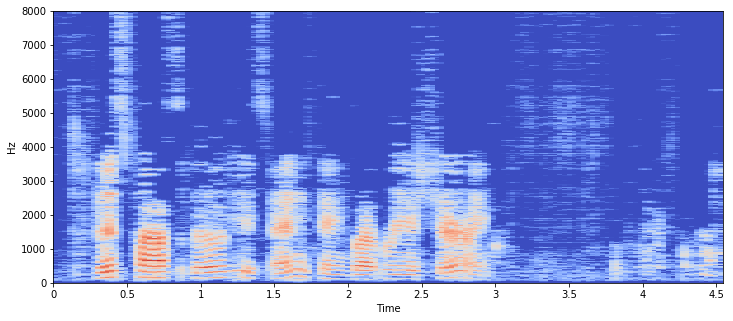

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

X = librosa.stft(S_fin)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

# Taking Audio for Test #2

In [10]:
test_2, sr=librosa.load('test_x_02.wav', sr=None)
second = librosa.stft(test_2, n_fft=1024, hop_length=512)

second_abs = np.abs(second)
second_t = second_abs.T

In [11]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "./speech")
    res1 = sess.run(out_layer,feed_dict={x:second_t})

INFO:tensorflow:Restoring parameters from ./speech


# Reconstructing the Audio #2

In [13]:
second_rec = (second/second_abs) * res1.T
recons_=librosa.istft(second_rec, win_length= 1024, hop_length=512)
librosa.output.write_wav('test_s_02_recons.wav', recons_, sr)

In [15]:
import IPython.display as ipd
ipd.Audio('./test_s_02_recons.wav')

# Spectogram of Reconstructed Audio #1

/opt/Anaconda3-5.0.1/envs/e533/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


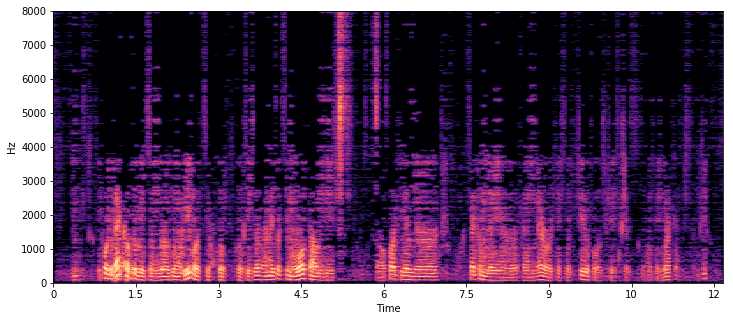

In [24]:
X = librosa.stft(recons_)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')